In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

In [2]:
patient = pd.read_csv('./data/PatientInfo.csv')

# drop columns that I don't need for network graph
patient = patient[["patient_id","infection_case","infected_by"]]

# infected_by has some dirty data in it, fixing them
patient["patient_id"] = patient.patient_id.astype(str)

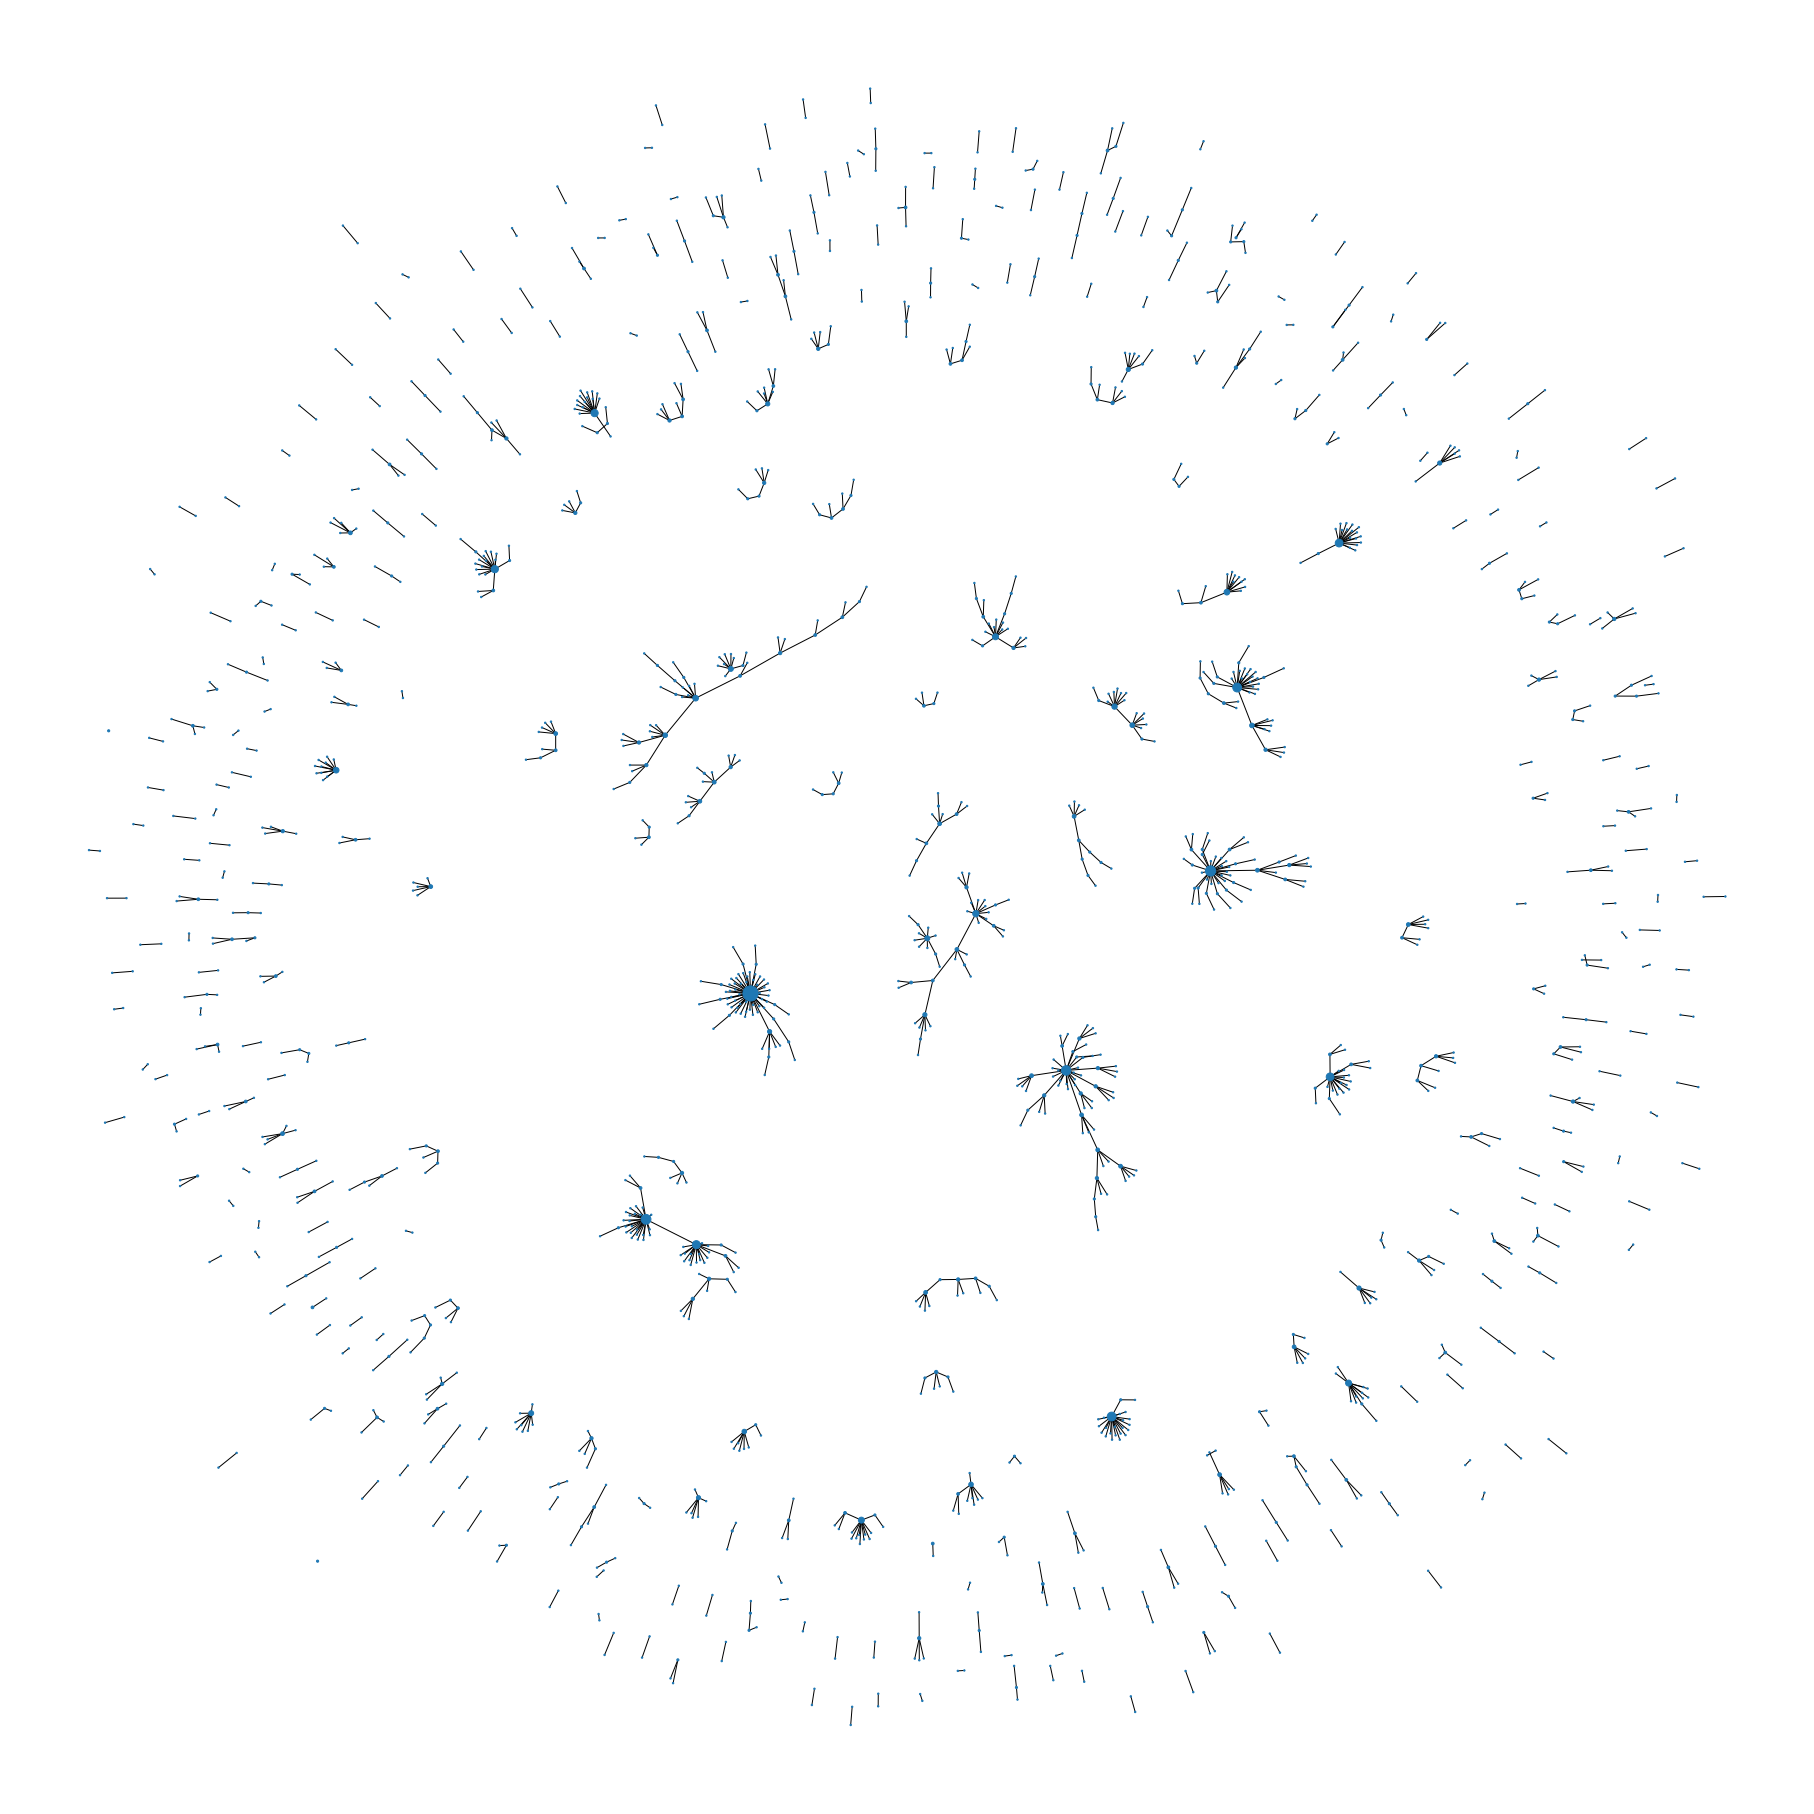

In [3]:
G = nx.Graph()

for _, row in patient.iterrows():
    if (not pd.isnull(row['infected_by'])):
        G.add_edge(row.patient_id,row.infected_by)

d = dict(G.degree)

nx.draw_spring(G, with_labels=False, nodelist=d.keys(), node_size=[v**1.2 * 2 for v in d.values()])

plt.show()

# this ONLY shows direct infected by indicated in patient data

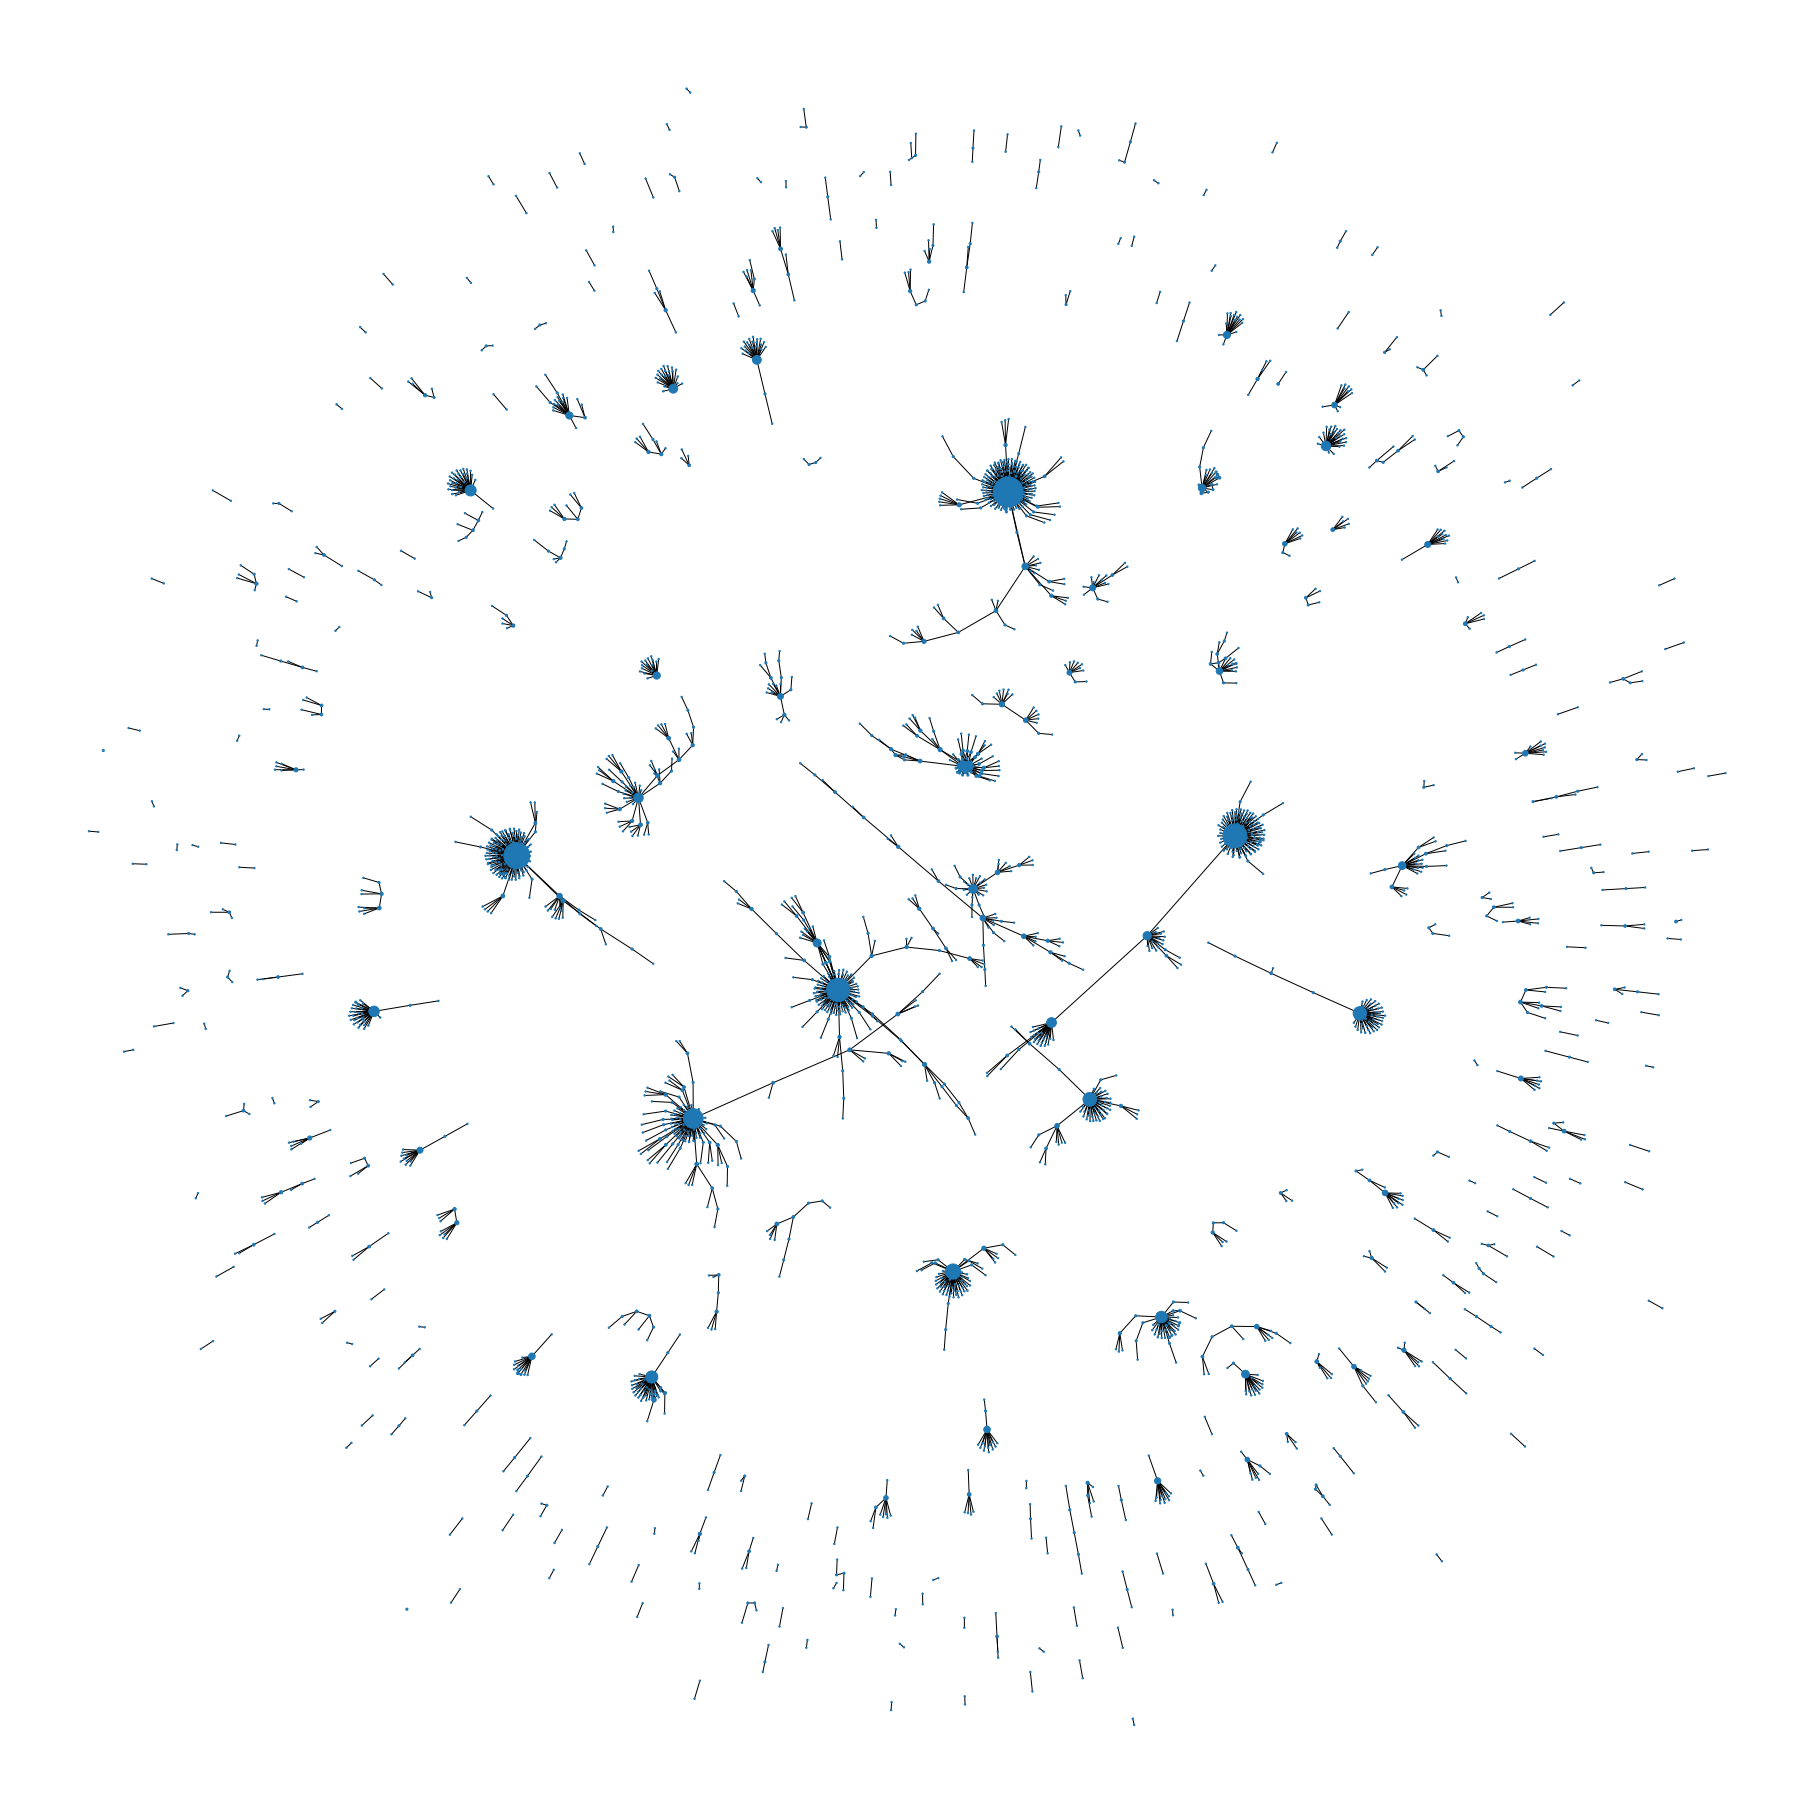

In [4]:
G = nx.Graph()

for _, row in patient.iterrows():
    if (not pd.isnull(row['infected_by'])):
        G.add_edge(row.patient_id,row.infected_by)
    if((not pd.isnull(row['infection_case'])) and (row['infection_case'] not in ["contact with patient","overseas inflow","etc"])):
        G.add_edge(row.patient_id,row.infection_case)

d = dict(G.degree)

nx.draw_spring(G, with_labels=False, nodelist=d.keys(), node_size=[v**1.2 * 2 for v in d.values()])

plt.show()

# this shows patient <-> infected by, and patient <-> infection_case

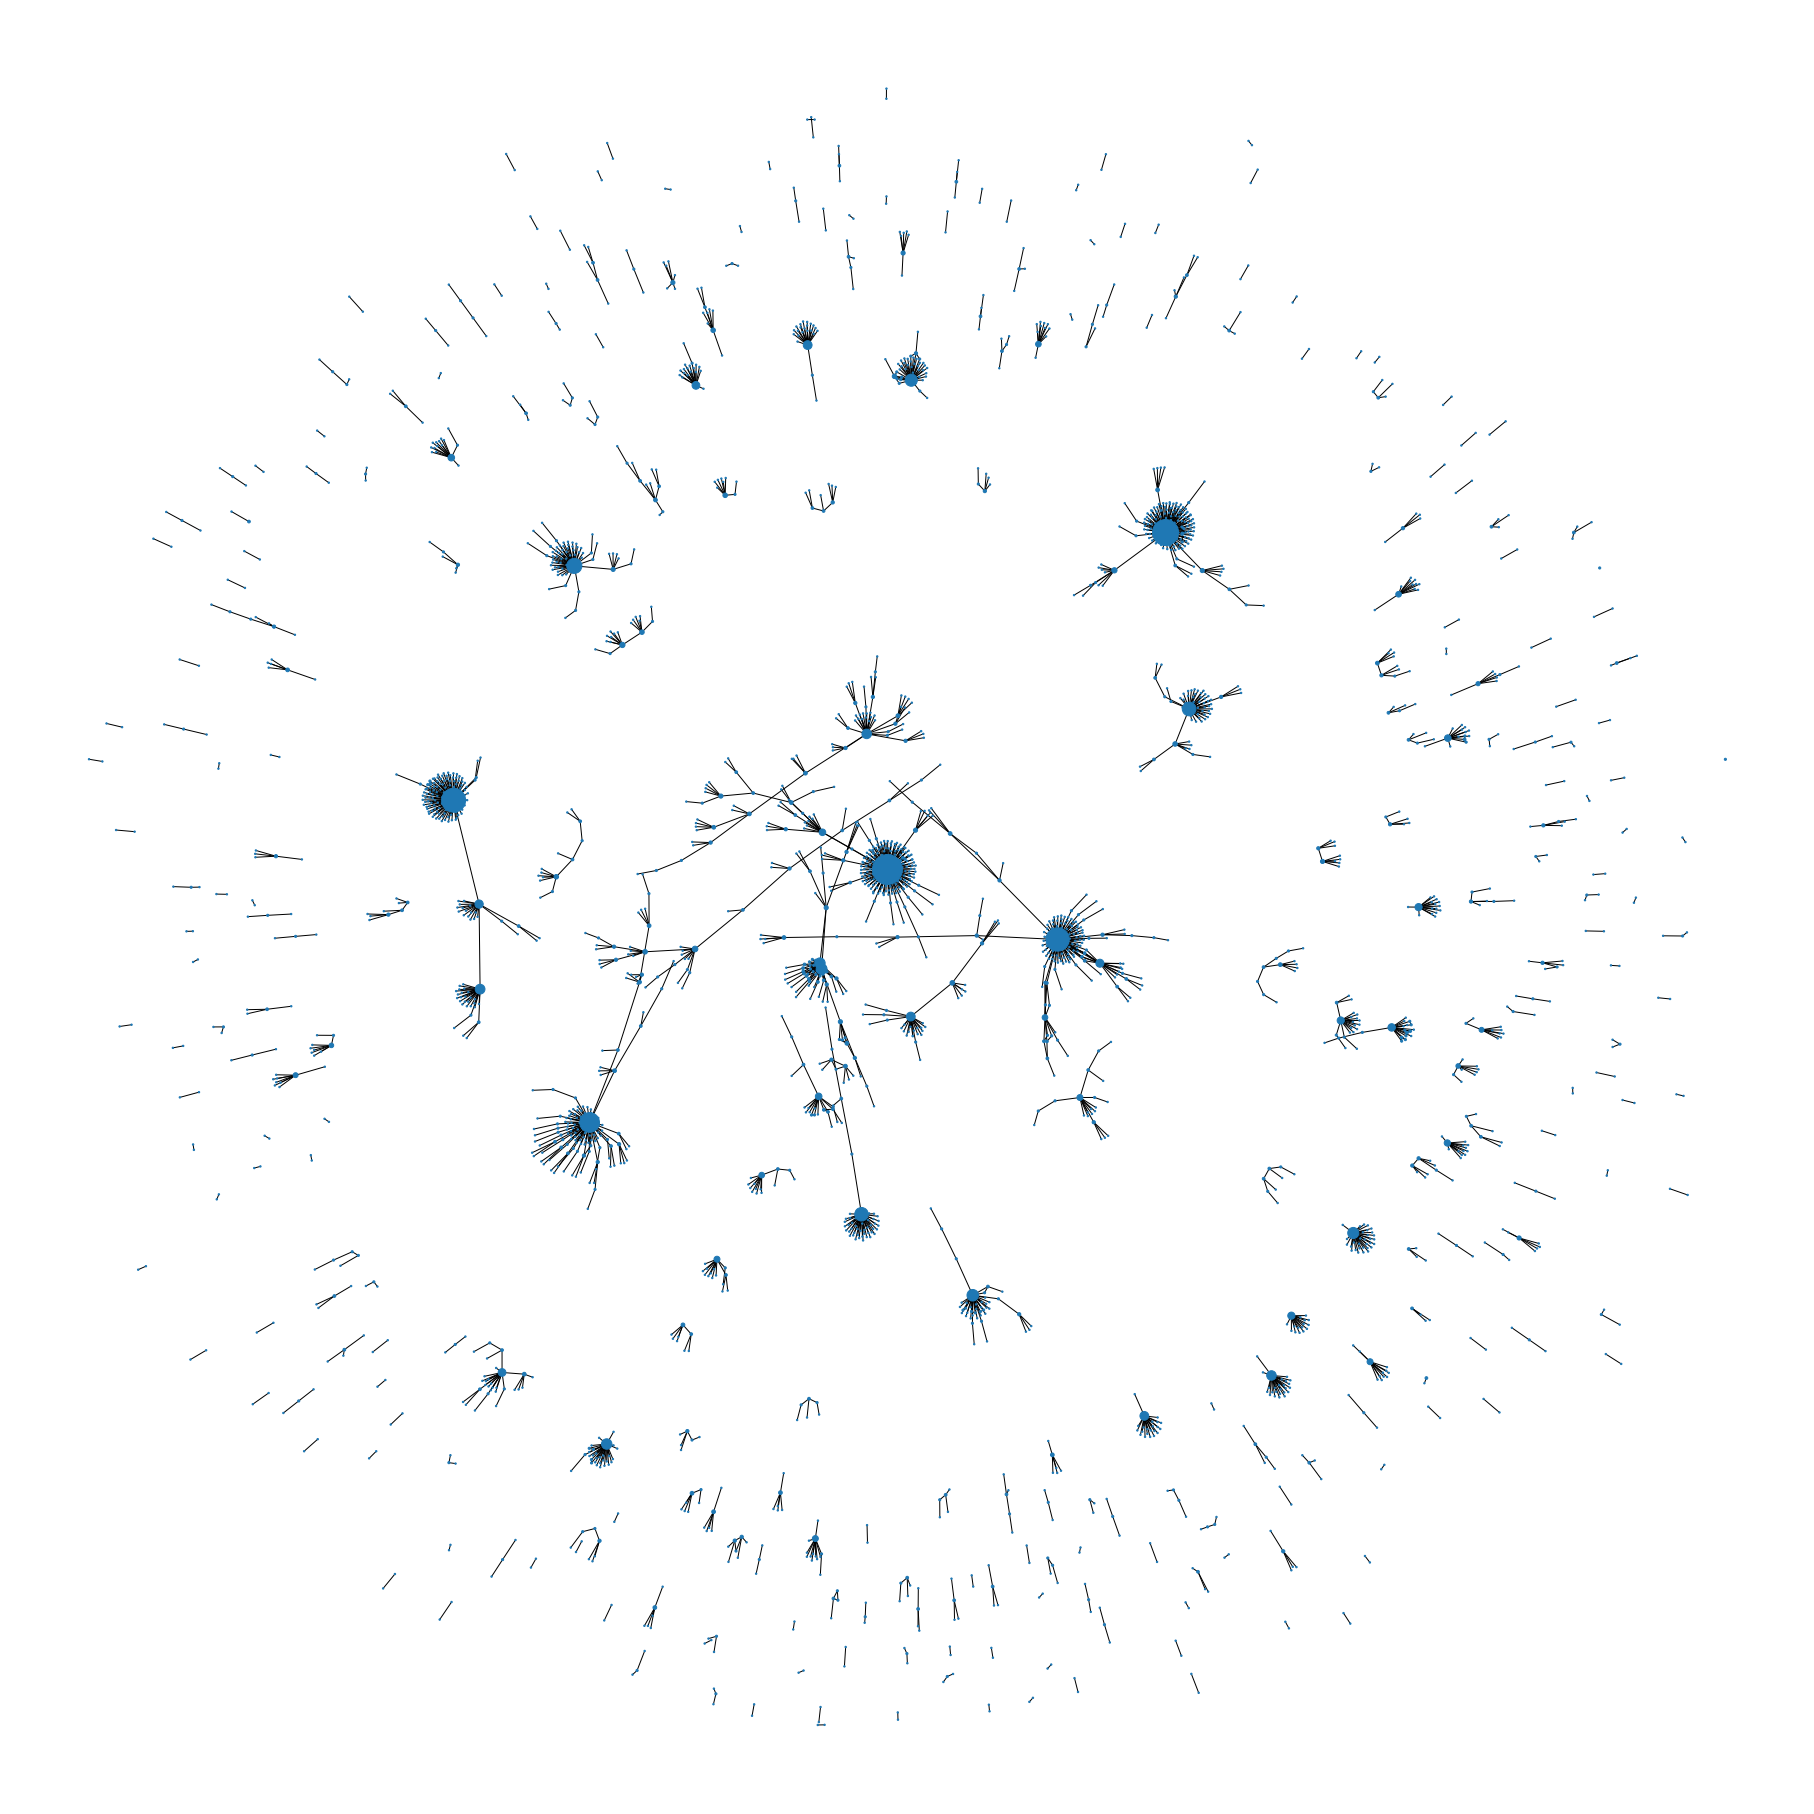

In [5]:
G = nx.Graph()

for _, row in patient.iterrows():
    if (not pd.isnull(row['infected_by'])):
        G.add_edge(row.patient_id,row.infected_by)
    if((not pd.isnull(row['infection_case'])) and (row['infection_case'] not in ["contact with patient","overseas inflow","etc"])):
        G.add_edge(row.patient_id,row.infection_case)
        if (not pd.isnull(row['infected_by'])):
            G.add_edge(row.infection_case,row.infected_by)

d = dict(G.degree)

nx.draw_spring(G, with_labels=False, nodelist=d.keys(), node_size=[v**1.2 * 2 for v in d.values()])
plt.show()

# this isn't a completely accurate representation - the problem is that for a lot of patient in the data, they
# don't have the "infection_case" as a group and an infected by at the same time (happens but rare).
# What I ended up doing was to plot all 3 relationship between patient, infection case, and infected by as
# edges in the network graph, resulting in probably a few more edges in the end.  However, this ended up linking
# some unconnected graphs.